# EDA for titanic dataset
## Understanding the variables

In [89]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [90]:
# reading the dataset using read_csv function

data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


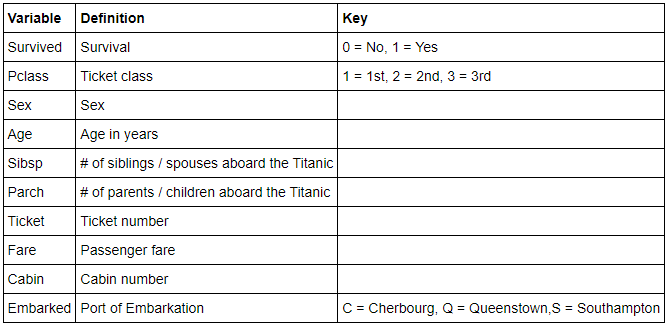

In [91]:
data.shape

(891, 12)

In [92]:
# Checking the datatypes
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [93]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
# custom function for counting categories in each variable.

def category_count(variable):
    value = data[variable].value_counts().count()
    return value

In [95]:
for i in data.columns:
    print(i,":",category_count(i))

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


* The above loop is to check which variables can be encoded using **one hot encoding**. <br>
* The variables having no of categories **less than 10** can be encoded using one hot encoding. Where as more than 10 have to encoded using other process like **one hot encoding with multiple categories**.

In [96]:
# simple function to know about duplicates

data['PassengerId'].duplicated().sum()

0

## Dealing with Missing values

In [97]:
# checking if there are any null values present.
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* There are some **null** values in variables **Age and Cabin**. Which will dealt with further in this notebook.
* Missing values can be dealt in various ways like **using central tendency** , **random sample imputation** etc..
* In this notebook I am going to use **Random Sample Imputation**.

In [98]:
# custom function for imputing nan values

def impute_nan(df,variable):
    """
    After dropping the null values taking same no of variables that have null values from the non null values in variable
    """
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=42)
    """
    To replace random_sample values in null vaules changing the index to null value index
    """
    random_sample.index = df[df[variable].isnull()].index
    """
    assuming the random sample values to replace null values using .loc function
    """
    df.loc[df[variable].isnull(),variable] = random_sample

In [99]:
impute_nan(data,'Age')
impute_nan(data,'Embarked')

**For cabin the number of null values(327) is greater than values(91), so without the replace parameter sample function cannot take 327 values from 91 without repetation so i have done imputation for this variable separately.**

In [100]:
random_sample = data['Cabin'].dropna().sample(data['Cabin'].isnull().sum(), replace=True, random_state=42)
random_sample.index = data[data['Cabin'].isnull()].index
data.loc[data['Cabin'].isnull(),'Cabin'] = random_sample

In [101]:
data[['Age','Embarked','Cabin']].isnull().sum()

Age         0
Embarked    0
Cabin       0
dtype: int64

* As you can see now there are **no null** values in the dataset, ready for further exploration.

## Checking for outliers

* After knowing the variables in the dataset domain knowledge  or common sense indicates that only **Fare and Age** are more or less eligible for checking the presence of outliers using **Boxplot**.

Text(0.5, 1.0, 'Age')

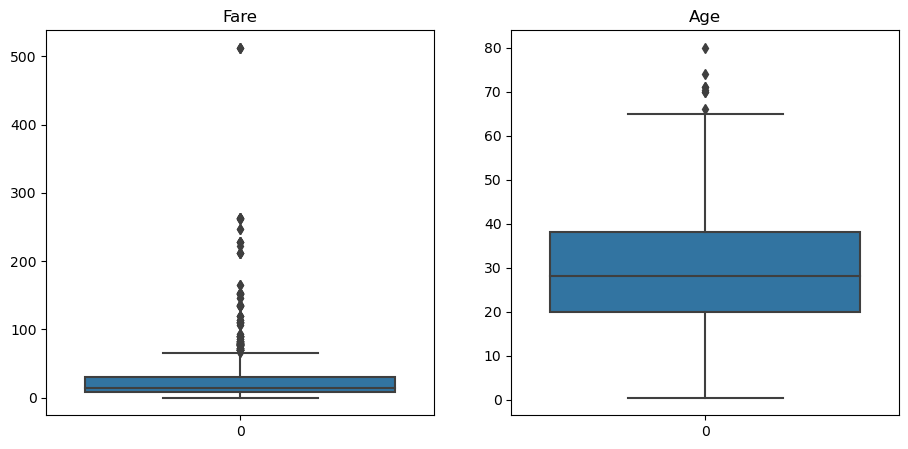

In [102]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.boxplot(data['Fare'])
plt.title('Fare')

plt.subplot(1,2,2)
sns.boxplot(data['Age'])
plt.title('Age')

* There are some outliers in **Age** and its common nothing that can affect the precitions of dependent variable so leaving them be. <br>
* In **Fare** there are a lots of outliers but considering the dataset the first class tickets price is really high, so outliers can be visible as per statistics but domain knowledge they are accepatable.

## Univariate Analysis

In [103]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Count of gender')

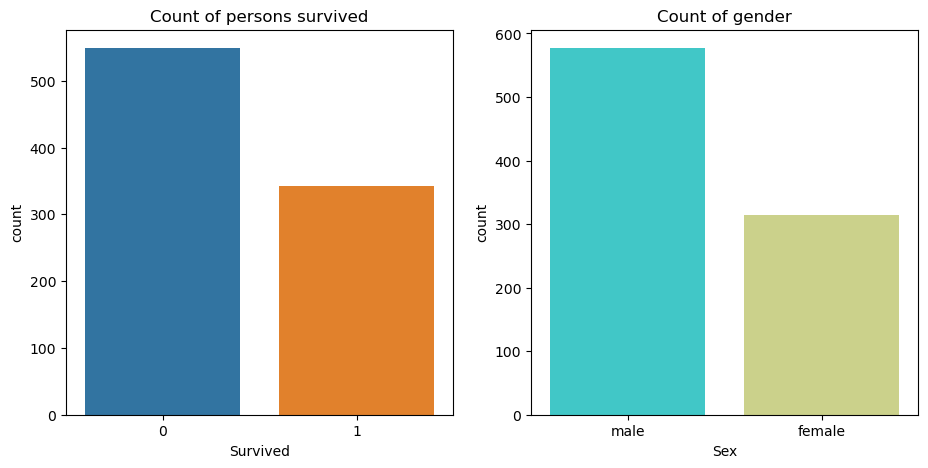

In [104]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.countplot(x=data['Survived'])
plt.title('Count of persons survived')

plt.subplot(1,2,2)
sns.countplot(x=data['Sex'],palette='rainbow')
plt.title('Count of gender')

* Countplot of survived suggesting how many have survived and how many are not survived 
* Countplot of sex suggest how many male and female boarded the ship.

<Axes: xlabel='Parch', ylabel='count'>

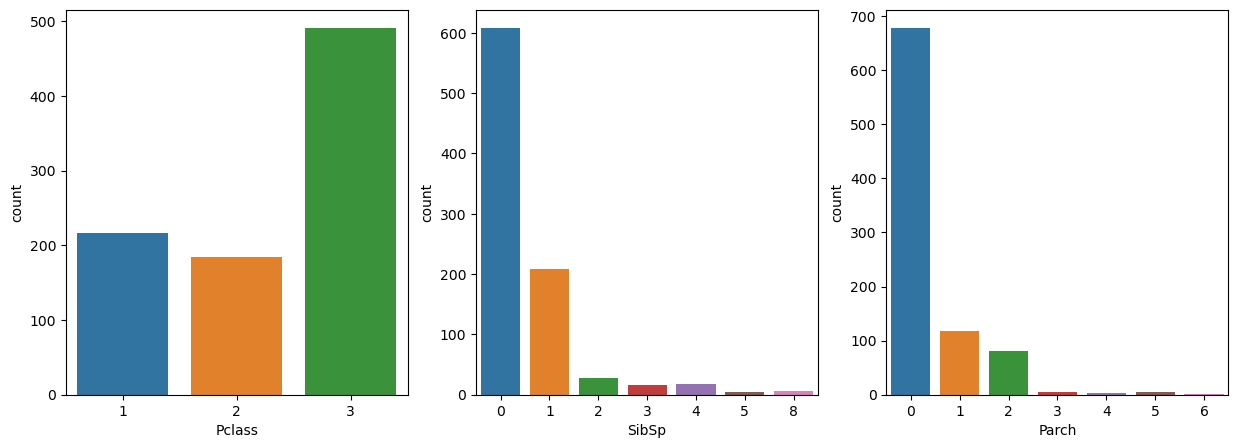

In [105]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x=data['Pclass'])

plt.subplot(1,3,2)
sns.countplot(x=data['SibSp'])

plt.subplot(1,3,3)
sns.countplot(x=data['Parch'])

## Bivariate and Multivariate Analysis

* Before moving to analysis some of the variables which has datatype of int but the the sense of the data is categorical like p_class, sibsp etc. So converting them into **object** will be useful.

In [106]:
data['Pclass'] = data['Pclass'].astype('object')
data['Survived'] = data['Survived'].astype('object')
data['SibSp'] = data['SibSp'].astype('object')
data['Parch'] = data['Parch'].astype('object')

In [107]:
data.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp           object
Parch           object
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 1. Does Pcalss has an impact on Survived variable ? 

* Since they both are **categorical** variables, we can use **chi-squared test** to konwn if there is any noticeable realtion between them.

**Hypothesis** <br>

1. Null hypothesis (H0): There is **No** relationship between Pcalss and Survived <br>
2. Alternate Hypothesis (H1) : There is relationship between both.
3. Assuming alpha is **0.05**

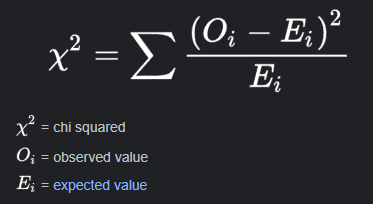

In [108]:
matrix = pd.crosstab(data['Pclass'],data['Survived'])
print(matrix)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [109]:
val = stats.chi2_contingency(matrix)
val

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [110]:
val.expected_freq

array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]])

In [111]:
from scipy.stats import chi2

In [112]:
critical_value = chi2.ppf(q=1-0.05,df=val.dof)
print("Critical value:", critical_value)

Critical value: 5.991464547107979


In [113]:
if val.pvalue < 0.05 and val.statistic > critical_value:
    print("We reject the Null hypothesis.")
else:
    print("We accept the Null hypothesis.")

We reject the Null hypothesis.


**This suggests that there is a relation between the pclass and survived** which can be useful in feature engineering.

**List of hypothesis to check** <br>

1. Does **Sex** have an impact on Survived ? 
2. Does **Sibsp** have an impact on Survived ?
3. Does **Parch** have an impact on Survived ?
4. Does **Embarked** have an impact on Survived?


**Hypothesis**<br>

1. Null Hypothesis(H0): `No` Relationship
2. Alternate Hypothesis(H1): There is relationship
3. Alpha value is **0.05**

In [114]:
def chisquared_test(data, var, dependent):
    
    data_matrix = pd.crosstab(data[var],data[dependent])
    result = stats.chi2_contingency(data_matrix)
    
    if result.pvalue < 0.05:
        print(" p value:", round(result.pvalue,7), '\n', var, 
              "has significant impact on Survived.","\n")
    else:
        print(" p value:", round(result.pvalue,7), '\n', var, 
              "has no significant impact, can be ignored if needed in feature engineering.","\n")

In [115]:
chisquared_test(data, 'Sex', 'Survived')
chisquared_test(data, 'SibSp', 'Survived')
chisquared_test(data, 'Parch', 'Survived')
chisquared_test(data, 'Embarked', 'Survived')

 p value: 0.0 
 Sex has significant impact on Survived. 

 p value: 1.6e-06 
 SibSp has significant impact on Survived. 

 p value: 9.7e-05 
 Parch has significant impact on Survived. 

 p value: 2.3e-06 
 Embarked has significant impact on Survived. 



**From the above results it is evident that these variables have significant impact on Survivied variable**

In [116]:
chisquared_test(data, 'Ticket','Survived')
chisquared_test(data, 'Cabin','Survived')
chisquared_test(data, 'Name','Survived')

 p value: 0.0115273 
 Ticket has significant impact on Survived. 

 p value: 0.6351473 
 Cabin has no significant impact, can be ignored if needed in feature engineering. 

 p value: 0.4842482 
 Name has no significant impact, can be ignored if needed in feature engineering. 



* So its clearly evident that **Name** and **Cabin** has no impact on **Survived** varible can be dropped, for the ease of model deployment.
* But **Ticket** has a significant impact on **Survived**, So Ticket will be encoded further in this notebook, as it is a category variable.

In [165]:
temp_data = data.drop(columns=['Cabin','Name'])
temp_data.dtypes

PassengerId      int64
Survived        object
Pclass          object
Sex             object
Age            float64
SibSp           object
Parch           object
Ticket          object
Fare           float64
Embarked        object
dtype: object

### 2. Does Age have a significant impact on Survived variable ?

**Hypothesis** <br>

1. Null hypothesis (H0): There is **No** relationship between Age and Survived <br>
2. Alternate Hypothesis (H1) : There is relationship between both.
3. Assuming alpha is **0.05**

* I am going to use **oneway annova** test to find the relationship.

In [166]:
def annova_krushkal(data, cont):
    
    annova = stats.f_oneway(data[cont][data['Survived'] == 0], data[cont][data['Survived'] == 1])
    krushkal = stats.kruskal(data[cont][data['Survived'] == 0], data[cont][data['Survived'] == 1])
    
    if (annova.pvalue and krushkal.pvalue) < 0.05:
        print(" annova pvalue:",annova.pvalue,"\n","krushkal pvalue:",krushkal.pvalue,"\n",
              "Then we reject the null hypothesis and we can conclude there is relationship between both.")
    else:
        print(" annova pvalue:",annova.pvalue,"\n","krushkal pvalue:",krushkal.pvalue,"\n",
             "Then we accept the null hypothesis and there is no stasticial significance between both variables.")

In [167]:
annova_krushkal(data, 'Age')

 annova pvalue: 0.2663747481029658 
 krushkal pvalue: 0.640328946824587 
 Then we accept the null hypothesis and there is no stasticial significance between both variables.


* Both **Annova and Krushkal** tests show the p value > 0.05 so there is **NO strong relationship between Age and Survived**.

In [168]:
annova_krushkal(data, 'PassengerId')

 annova pvalue: 0.8813657768798144 
 krushkal pvalue: 0.8812671674895101 
 Then we accept the null hypothesis and there is no stasticial significance between both variables.


* Since annova test dosent perform well with non-normal distributions, considering p value from kruskal test will also suggests **there is NO strong relationship fare and Survived**.

In [169]:
annova_krushkal(data, 'Fare')

 annova pvalue: 6.120189341921873e-15 
 krushkal pvalue: 4.547532067492866e-22 
 Then we reject the null hypothesis and we can conclude there is relationship between both.


* The above tests suggest that **Fare** has an strong impact on **Survived** variable.
* So based on the conclusions **Age and PassengerId** can be dropped just based on statistical tests.

In [170]:
temp_data = temp_data.drop(columns=['Age','PassengerId'])
temp_data.dtypes

Survived     object
Pclass       object
Sex          object
SibSp        object
Parch        object
Ticket       object
Fare        float64
Embarked     object
dtype: object

## Feature Engineering

### One-Hot Encoing with multiple categories

* since **Ticket** has a lot of different categories, to tackle this I am going to use **encoding the top 10 most frequent categories in a variable** and eliminates the other categories.
* This ensembling method has been found by reasearchers in a competetion called as **KDD Orange**.

In [171]:
temp_data['Ticket'].value_counts().count()

681

* As you can see there are **681 different categories** present in Ticket variable so using one-hot encoding on this variable will give us a 680 more variable to deal with, so to avoid that I am using the method which has been used in KDD orange competetion.

In [145]:
temp_data['Ticket'].value_counts().head(10)

Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

* Now that I have the top 10 most frequent catergories in Ticket, I will replace the Ticket columns with these 10 values with **random sample imputation with replacement**.

In [150]:
# creating a dataframe to be used in random sample imputation.

df = pd.DataFrame(data=temp_data['Ticket'].value_counts().head(10).index, index=range(0,10))
df

,Ticket
0,347082
1,CA. 2343
2,1601
3,3101295
4,CA 2144
5,347088
6,S.O.C. 14879
7,382652
8,LINE
9,PC 17757


In [155]:
ticket_top10 = df.sample(temp_data['Ticket'].count(), replace=True, random_state=42)

ticket_top10.index = temp_data['Ticket'].index
temp_data['Ticket'] = ticket_top10

In [156]:
temp_data['Ticket'].value_counts()

Ticket
347082          106
PC 17757         98
1601             98
CA 2144          95
S.O.C. 14879     85
347088           85
382652           84
3101295          82
LINE             82
CA. 2343         76
Name: count, dtype: int64

* The different catrgories in **Ticket** variable has been replaced with top 10 most frequent category values, now the temp_data is ready to one-hot encode.

### One Hot Encoding

* Converting the category type feature into numerical variables by performing one hot encoding on **Pclass, Sex, parch, Ticket and Embarked**
* Since **Survived** is our dependent variable dropping that variable and performing one hot encoding on other variables availabe.

In [157]:
temp_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,1,0,S.O.C. 14879,7.2500,S
1,1,1,female,1,0,3101295,71.2833,C
2,1,3,female,0,0,382652,7.9250,S
3,1,1,female,1,0,CA 2144,53.1000,S
4,0,3,male,0,0,S.O.C. 14879,8.0500,S


In [159]:
temp_data = temp_data.drop(columns=['Survived'])

In [162]:
cleaned_data = pd.get_dummies(temp_data, dtype=int)

In [163]:
cleaned_data['Survived'] = data['Survived']
cleaned_data.head()

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Ticket_382652,Ticket_CA 2144,Ticket_CA. 2343,Ticket_LINE,Ticket_PC 17757,Ticket_S.O.C. 14879,Embarked_C,Embarked_Q,Embarked_S,Survived
0,7.2500,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,71.2833,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,7.9250,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53.1000,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
4,8.0500,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [173]:
# saving the data as a CSV file for further use in prediction.
cleaned_data.to_csv('titanic_cleaned_data.csv')